# Homework 12 Solutions
I need to write a function similar to PIB from the lecture notes, so lets load it in just so we can have it for reference

In [1]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 5/rk2.py'
import numpy as np
def rk2(y0, t0, tf, dt, deriv_func):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:         Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values. The first intex corresponds to the time step and the second corresponds to
        the dependent variable number
    """

    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t)    # Number of steps to take

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(n_steps-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f
        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
    return t, y


In [2]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 2/bisect.py'
import numpy as np
def bisect(func_name, xL, xR, args):
    """
    Find the solution the input equation f(x) = 0 for some input function. Start
    with the interval xL xR, and return a solution with a relative error
    0.5e-5.

    Inputs
    ----------
    func_name: This is the name of the function that I want to find roots for

    xL:        Smaller 'x' value I want to evaluate func_name at

    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    fL = func_name(xL,args)
    fR = func_name(xR,args)
    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign. fl = {}, fr = {}".format(fL, fR)) #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        #print(args)
        fMP = func_name(xMP,args)
        #print(args)
        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP

        else:
            xL = xMP
            fL = fMP
    x_zero = 0.5 * (xL + xR)

    return x_zero


differential I was to solve is, 
\begin{equation}
	(1-x^2)y^{\prime\prime} - 2xy^\prime + l(l+1)y = 0
\end{equation}
So the differential I need to put into rk2 is going to be,
\begin{equation}
	y^{\prime\prime} = \frac{2xy^\prime - l(l+1)y}{(1-x^2)} 
\end{equation}

In [3]:
def legendre(w, x):
    """
    Differential equations for the eigenvalue problem of the Legendre Polynomials
    """
    f0 = w[1]
    f1 = (2*x*w[1] - w[2]*(w[2] + 1)*w[0]) / (1 - x**2)
    f2 = 0
    return np.array([f0, f1, f2])

But for this problem I'll want to be able to switch between the different boundary conditions, so I'm going to add an extra input to the function that lets me jump between the different conditions

In [4]:
def BC_LEG(L, flag):
    if flag == 0:
        y0 = 1
        yp0 = 0
    elif flag == 1:
        y0 = -1
        yp0 = 1
    elif flag == 2:
        y0 = 1
        yp0 = -3
    else:
        y0 = 1
        yp0 = -21
    w0 = [y0, yp0, L]
    x, y = rk2(w0, -0.9999, 0.9999, 0.001, legendre)
    
    return y[-1,0] - 1

In [5]:
import matplotlib.pyplot as plt

def plotL(flag):
    if flag == 0:
        y0 = 1
        yp0 = 0
    elif flag == 1:
        y0 = -1
        yp0 = 1
    elif flag == 2:
        y0 = 1
        yp0 = -3
    else:
        y0 = 1
        yp0 = -21
    L_list = np.linspace(-0.5,10, 100)
    g = np.zeros(len(L_list))
    for i in range(len(g)):
        g[i] = BC_LEG(L_list[i], flag)
    
    plt.figure(1, figsize = (20,10))
    plt.plot(L_list, g, '--', label = "Boundry Conditions, $y(-1)$ = {}, $y^\prime$(-1) = {}".format(y0, yp0))
    plt.title('Endpoint of the Legendre Polynomail $y(1)$', size = 14)
    plt.xlabel('Eigenvalue $\ell$', size = 14)
    plt.ylabel('$y(1)$', size = 14)
    plt.legend()
    plt.xticks(range(10))
    plt.grid(True, which='both')

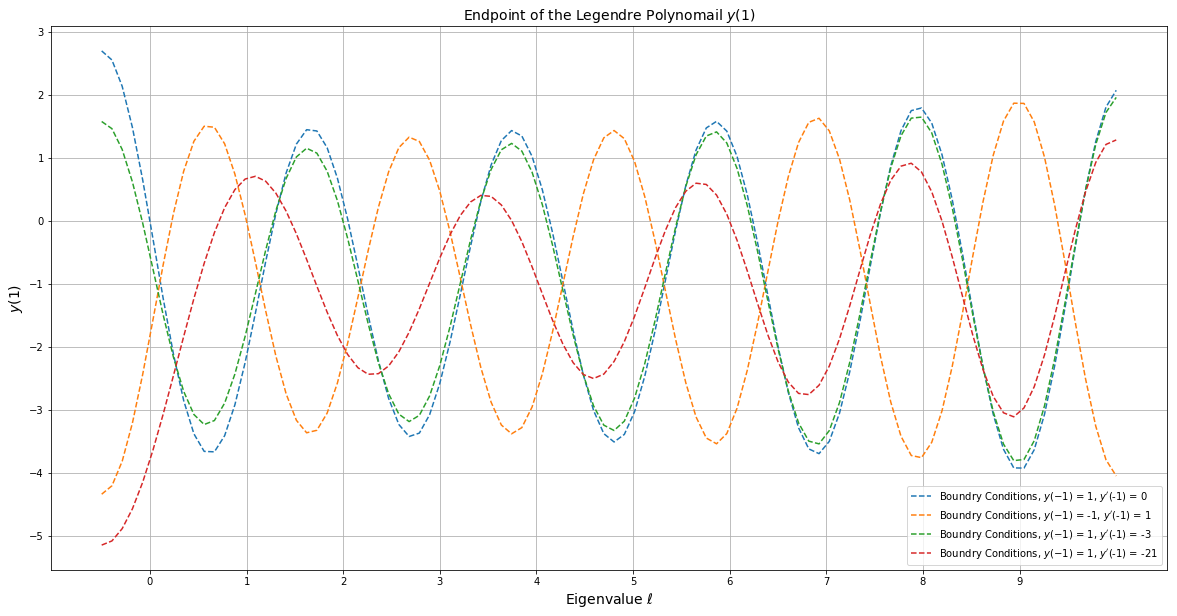

In [6]:
for n in [0,1,2,3]:
    plotL(n)

In [7]:
import matplotlib.pyplot as plt
def plot_legendre(flag):
    """
    Plots the ground state for the PIB porblem
    """
    L1 = bisect(BC_LEG, .5, 1.5, flag)
    if flag == 0:
        y0 = 1
        yp0 = 0
        L1 = bisect(BC_LEG, -0.1, 0.1, flag)
    elif flag == 1:
        y0 = -1
        yp0 = 1
        L1 = bisect(BC_LEG, 0.5, 1.5, flag)
    elif flag == 2:
        y0 = 1
        yp0 = -3
        L1 = bisect(BC_LEG, 1.5, 2.5, flag)
    else:
        y0 = 1
        yp0 = -21
        L1 = bisect(BC_LEG, 5.5, 6.5, flag)
    print(flag)
    w0 = [y0, yp0, L1]
        
    x2, w = rk2(w0, -0.999, 0.999, 0.001, legendre)
    plt.figure(1, figsize = (10,8))

    plt.plot(x2, w[:, 0], '--', label = 'Legendre Polynomial for $\ell$ = %f'%L1)
    plt.xlabel('Distance (m)', size = 14)
    plt.title("Few Legendre Polynomials", size = 14)
    plt.grid(True)
    plt.legend()

0
1
2
Both values give the same sign. fl = -0.9793488836054592, fr = -0.14267879446816512
3


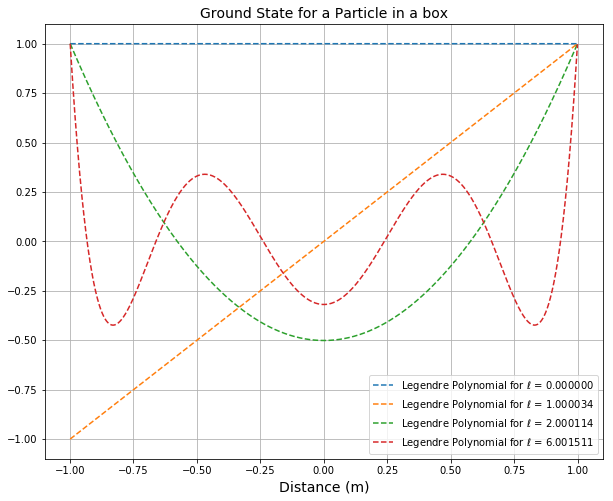

In [8]:
for n in range(4):
    plot_legendre(n)